In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from utils.signal_utils import Bandpass, DCFilter, Notch, Normalize, Resample

In [2]:
root = 'continous_data'
subject = 'Debug'
session = 'session_18'

In [3]:
data = np.load(os.path.join(root, subject, session, 'data.npy'))
# channels: timestamps, triggers, 6 EEG channels

In [4]:
#data = data[:, 500:1200]
data.shape
EEG_data = data[2:8, :]
EEG_data = Bandpass(EEG_data, 5., 40.)
#EEG_data = DCFilter(EEG_data)

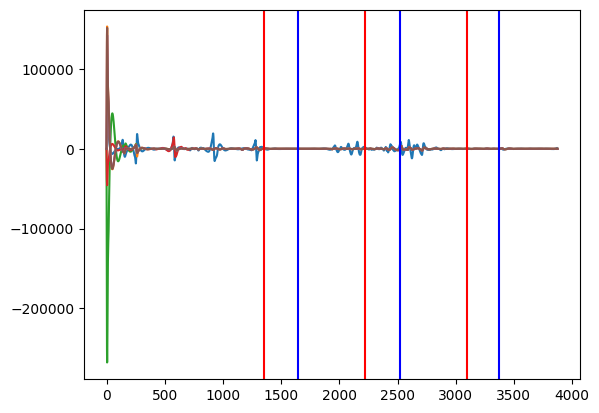

In [5]:
for channel in EEG_data:
    plt.plot(channel)
for i, trigger in enumerate(data[1]):
    if trigger == 10:
        color = 'r'
    else:
        color = 'b'
    if trigger > 0:
        plt.axvline(x=i, color=color, label='trigger')

plt.show()